# Problem Statement:
You have been given a task to analyze financial data of a fintech firm who are going to transition into an AI first strategy. You have a pivotal role in this transition, you must find all the necessary action points that will bring more efficiency in their transition.

# Objective:
Analyzing the financial data and devise multiple strategies such as forecasting, classification, regression, clustering for efficient and smooth transition

# Tasks to be Performed:
Preprocess and remove the noise from the data

Devise strategies that can be formed for the business problem

Feature engineer data according to the business requirements

Model and Evaluate various strategies that will be used to find actionable insights

# Task 1: Preprocess and Remove Noise from Data

**1.Importing Necessary Libraries**

In [1]:
import pandas as pd                                                                     # for data manipulation
import numpy as np                                                                      # for numerical operation
import matplotlib.pyplot as plt                                                         # for visualization
import seaborn as sns                                                                   # for visualization
from sklearn.model_selection import train_test_split                                    # for spliting data to train & test sets
from sklearn.ensemble import RandomForestRegressor                                      # for clasification problems
from sklearn.linear_model import LinearRegression                                       # for clasification problems
from sklearn.cluster import KMeans                                                      # for culstering
from sklearn.preprocessing import StandardScaler, OrdinalEncoder                        # for scaling & encodeing
from sklearn.impute import SimpleImputer                                                # for handling missing values
from sklearn.metrics import classification_report, mean_squared_error, silhouette_score # To Evaluate Model

In [2]:
# subpress warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

**2.Data Loading**

In [3]:
file_path = r'C:\Users\SAMIM IMTIAZ\Desktop\DASI CERTIFICATION\data.csv'
df = pd.read_csv(file_path)
df.head() 

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [4]:
df.columns

Index(['Bankrupt?', ' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Operating Gross Margin', ' Realized Sales Gross Margin',
       ' Operating Profit Rate', ' Pre-tax net Interest Rate',
       ' After-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',
       ' Continuous interest rate (after tax)', ' Operating Expense Rate',
       ' Research and development expense rate', ' Cash flow rate',
       ' Interest-bearing debt interest rate', ' Tax rate (A)',
       ' Net Value Per Share (B)', ' Net Value Per Share (A)',
       ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons',
       ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)',
       ' Operating Profit Per Share (Yuan ¥)',
       ' Per Share Net profit before tax (Yuan ¥)',
       ' Realized Sales Gross Profit Growth Rate',
       ' Operating Profit

**Step 1: Handle Missing Values**

In [5]:
from sklearn.impute import SimpleImputer 

imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

**Step 2: Remove Duplicates**

**Drop duplicate rows to prevent data redundancy**

In [6]:
df_imputed = df_imputed.drop_duplicates()

**Step 3: Outlier Detection and Handling**

**Use IsolationForest to detect outliers**

In [7]:
from sklearn.ensemble import IsolationForest

iforest = IsolationForest (contamination=0.1)
iforest.fit(df_imputed)

df_imputed['outlier'] = iforest.predict(df_imputed)
df_imputed = df_imputed[df_imputed['outlier'] == 1]
df_imputed = df_imputed.drop('outlier', axis=1)

**Step 4: Data Normalization**

**Scale numeric features using StandardScaler**

In [8]:
# Exclude 'Bankrupt?' column from scaling

from sklearn.preprocessing import StandardScaler

numeric_cols = df_imputed.select_dtypes(include=['int64', 'float64']).columns
numeric_cols = [col for col in numeric_cols if col != 'Bankrupt?']

scaler = StandardScaler()
df_imputed[numeric_cols] = scaler.fit_transform(df_imputed[numeric_cols])

**Step 5: Data Transformation**

**Apply encoding to categorical features (if any)**

In [9]:
# Check if 'Bankrupt?' is categorical

from sklearn.preprocessing import OrdinalEncoder

if df_imputed['Bankrupt?'].dtype == 'object':
    categorical_cols = df_imputed.select_dtypes(include='object').columns
    encoder = OrdinalEncoder()
    df_imputed[categorical_cols] = encoder.fit_transform(df_imputed[categorical_cols])

**Verify the preprocessed data:**

In [10]:
df_imputed.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1.0,-2.876529,-2.819684,-3.201762,-0.575509,-0.575118,-0.342707,-2.245277,-2.487135,-3.061365,...,-3.365046,-0.021901,-0.084072,-0.575709,-5.930515,2.903920,-0.060758,-0.096132,0.0,-0.850439
1,1.0,-0.878767,-0.448953,-0.810544,0.218478,0.220779,-0.497671,-0.296787,-0.285361,0.085821,...,-0.515083,-0.021901,-0.023127,0.218761,-0.440885,1.152745,14.368346,0.351170,0.0,-0.718293
4,1.0,-0.863175,-0.444411,-0.690580,-0.817355,-0.817547,-0.316494,-0.352551,-0.271943,-0.195879,...,-0.525300,-0.021901,-0.033461,-0.817379,-0.439304,-0.316374,-0.172855,0.748582,0.0,-0.269335
6,0.0,-2.443092,-2.375740,-2.546571,1.097209,1.101625,-0.183117,-1.752140,-1.810384,-2.480411,...,-2.646713,-0.021901,-0.022835,1.097271,-4.980866,3.538228,-0.059445,-0.085177,0.0,-0.875052
7,0.0,0.060868,0.232292,0.101879,-0.550086,-0.551594,-0.077495,-0.025616,-0.012910,0.044861,...,0.213403,-0.021901,-0.008072,-0.549835,0.236361,-0.290609,-0.034693,0.052765,0.0,-0.287715


In [11]:
df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6137 entries, 0 to 6817
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6137 non-null   float64
 1    ROA(C) before interest and depreciation before interest  6137 non-null   float64
 2    ROA(A) before interest and % after tax                   6137 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6137 non-null   float64
 4    Operating Gross Margin                                   6137 non-null   float64
 5    Realized Sales Gross Margin                              6137 non-null   float64
 6    Operating Profit Rate                                    6137 non-null   float64
 7    Pre-tax net Interest Rate                                6137 non-null   float64
 8    After-tax net Interest

In [12]:
df_imputed.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6137.000000,6.137000e+03,6.137000e+03,6.137000e+03,6.137000e+03,6.137000e+03,6.137000e+03,6.137000e+03,6.137000e+03,6.137000e+03,...,6.137000e+03,6.137000e+03,6.137000e+03,6.137000e+03,6.137000e+03,6.137000e+03,6.137000e+03,6.137000e+03,6137.0,6.137000e+03
mean,0.021509,-1.111489e-16,9.355036e-16,-2.593475e-16,-1.639447e-15,1.046652e-15,1.981924e-13,-3.817040e-14,5.759506e-13,5.765851e-14,...,1.463461e-15,2.315603e-18,-2.747463e-15,-3.830007e-15,6.335489e-15,4.390383e-15,-1.574610e-16,-4.189504e-15,0.0,1.852482e-17
std,0.145085,1.000081e+00,1.000081e+00,1.000081e+00,1.000081e+00,1.000081e+00,1.000081e+00,1.000081e+00,1.000081e+00,1.000081e+00,...,1.000081e+00,1.000081e+00,1.000081e+00,1.000081e+00,1.000081e+00,1.000081e+00,1.000081e+00,1.000081e+00,0.0,1.000081e+00
min,0.000000,-4.702788e+00,-6.143023e+00,-5.348437e+00,-5.850502e+00,-5.862806e+00,-1.387700e+01,-1.047661e+01,-1.122072e+01,-1.308889e+01,...,-8.168188e+00,-2.190116e-02,-4.920751e+01,-5.850199e+00,-8.211491e+00,-1.317290e+00,-1.673623e+00,-4.128923e+01,0.0,-9.521781e-01
25%,0.000000,-5.742170e-01,-4.591715e-01,-5.371633e-01,-6.504747e-01,-6.509180e-01,-3.134101e-01,-2.530494e-01,-2.171024e-01,-2.151053e-01,...,-4.275214e-01,-2.190116e-02,-2.364627e-02,-6.506603e-01,-3.429874e-01,-7.191273e-01,-4.920631e-02,-1.519320e-02,0.0,-5.889531e-01
50%,0.000000,-5.866541e-02,6.686270e-04,-4.461627e-02,-1.785153e-01,-1.791298e-01,1.193708e-02,3.233553e-02,4.834732e-02,-1.950329e-02,...,4.071422e-02,-2.190116e-02,-5.299949e-03,-1.786554e-01,1.035756e-01,-2.456175e-01,-4.776809e-02,-6.152399e-03,0.0,-3.177945e-01
75%,0.000000,5.795376e-01,5.502060e-01,5.725095e-01,4.824885e-01,4.756234e-01,4.436774e-01,4.423713e-01,4.275612e-01,1.861296e-01,...,5.669206e-01,-2.190116e-02,1.597347e-02,4.827638e-01,5.905009e-01,4.302466e-01,-4.094282e-02,3.108464e-02,0.0,2.064693e-01
max,1.000000,4.015855e+00,3.836076e+00,3.845006e+00,5.185785e+00,5.279107e+00,5.050964e+00,1.470998e+01,1.536859e+01,2.008487e+01,...,3.286767e+00,5.077893e+01,2.965763e+01,5.185776e+00,2.812103e+00,7.802959e+00,5.895893e+01,3.174169e+01,0.0,1.377008e+01


# Task 2: Devise strategies for the business problem¶

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, mean_squared_error, silhouette_score

In [14]:
print(df_imputed['Bankrupt?'].unique())  # Check unique values

[1. 0.]


In [15]:
# Encode 'Bankrupt?' as binary (if necessary) # Lambda function with apply()
#df_imputed['Bankrupt?'] = df_imputed['Bankrupt?'].apply(lambda x: 1 if x > 0 else 0)

In [16]:
#print(df_imputed['Bankrupt?'].unique())

In [17]:
#lambda function with the apply() method, can be slower for large datasets.

In [18]:
# Encode 'Bankrupt?' as binary (if necessary) # Vectorized operation:
df_imputed['Bankrupt?'] = (df_imputed['Bankrupt?'] > 0).astype(int)

In [19]:
print(df_imputed['Bankrupt?'].unique())

[1 0]


vectorized operation, is generally faster and more efficient for large datasets.

In [20]:
# Re-Split Data

X = df_imputed.drop('Bankrupt?', axis=1)
y = df_imputed['Bankrupt?']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Strategy 1: Financial Health Classification with RandomForestClasifier**

In [21]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_test)
print("RFC Accuracy:", accuracy_score(y_test,y_pred_rfc))
print("RFC Classification Report\n", classification_report(y_test,y_pred_rfc))

RFC Accuracy: 0.9771986970684039
RFC Classification Report
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1200
           1       0.00      0.00      0.00        28

    accuracy                           0.98      1228
   macro avg       0.49      0.50      0.49      1228
weighted avg       0.95      0.98      0.97      1228



**Strategy 2: Financial Metric Forecasting Select relevant features with LinearRegrassion**

In [22]:
# Select relevant features using column indices
X_revenue = X.iloc[:, [21, 28]]

In [23]:
#Define Target Variable
y_revenue = df_imputed[' Revenue Per Share (Yuan ¥)']

In [24]:
# Split data
X_train_revenue, X_test_revenue, y_train_revenue, y_test_revenue = train_test_split(X_revenue, y_revenue, test_size=0.2, random_state=42)

In [25]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

lr = LinearRegression()
lr.fit(X_train_revenue,y_train_revenue)
y_pred_lr = lr.predict(X_test_revenue)

In [26]:
# Evaluate performance

r2 = r2_score(y_test_revenue,y_pred_lr)
mae = mean_absolute_error(y_test_revenue,y_pred_lr)
mse = mean_squared_error(y_test_revenue,y_pred_lr)

print("R-squared:", r2)
print("MAE:", mae)
print("MSE:", mse)

R-squared: 0.11631417101458952
MAE: 0.6265247070778265
MSE: 1.2413168466082924


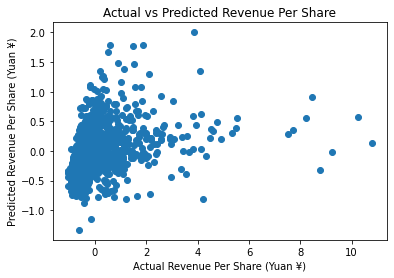

In [27]:
# Ploting

import matplotlib.pyplot as plt


# Create a scatter plot of actual vs predicted values
plt.figure(figsize=(6,4))
plt.scatter(y_test_revenue, y_pred_lr)
plt.xlabel('Actual Revenue Per Share (Yuan ¥)')
plt.ylabel('Predicted Revenue Per Share (Yuan ¥)')
plt.title('Actual vs Predicted Revenue Per Share')
plt.show()

**Feature Scatter Plots Insights**

- Continuous Net Profit Growth Rate: The scatter plot for Continuous Net Profit Growth Rate shows a weak positive correlation with Revenue Per Share (Yuan ¥).
- Revenue Per Share (Yuan ¥): This is the target variable, but if you'd like to mention the other feature in the plot, you could rephrase it as: The scatter plot for Revenue Per Share (Yuan ¥) vs Continuous Net Profit Growth Rate shows a weak positive correlation.

In [28]:
column_name28 = df_imputed.columns[28]
column_name21 = df_imputed.columns[21]
column_name22 = df_imputed.columns[22]
column_name29 = df_imputed.columns[29]
print(column_name28, column_name21, column_name22, column_name29)

 Continuous Net Profit Growth Rate  Revenue Per Share (Yuan ¥)  Operating Profit Per Share (Yuan ¥)  Total Asset Growth Rate


**Strategy 3: Clustering Analysis**

In [29]:
# Select relevant features

cluster_features = X[[' Total Asset Growth Rate', ' Revenue Per Share (Yuan ¥)', ' Operating Profit Per Share (Yuan ¥)']]
kmeans = KMeans(n_clusters=5)
kmeans.fit(cluster_features)
print("kmeans Silhouette Score:", silhouette_score(cluster_features, kmeans.labels_))

kmeans Silhouette Score: 0.3403207540301723


In [30]:
from sklearn.mixture import GaussianMixture

cluster_features = X[[' Total Asset Growth Rate', ' Revenue Per Share (Yuan ¥)', ' Operating Profit Per Share (Yuan ¥)']]
gmm = GaussianMixture(n_components=5)
gmm.fit(cluster_features)
labels = gmm.predict(cluster_features)
print(labels)

[0 0 0 ... 0 3 3]


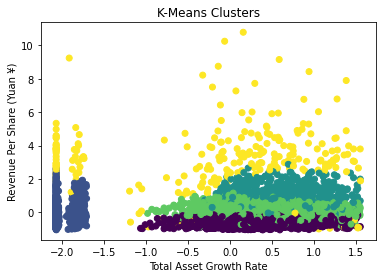

In [31]:
# Plot the clusters
plt.figure(figsize=(6, 4))
plt.scatter(cluster_features[' Total Asset Growth Rate'], cluster_features[' Revenue Per Share (Yuan ¥)'], c=labels)
plt.title('K-Means Clusters')
plt.xlabel('Total Asset Growth Rate')
plt.ylabel('Revenue Per Share (Yuan ¥)')
plt.show()

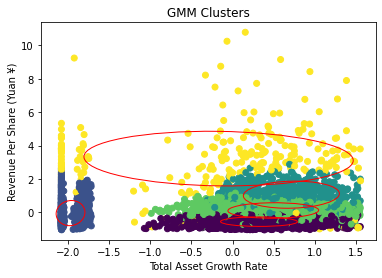

In [32]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
from sklearn.mixture import GaussianMixture

# Plot the clusters
plt.figure(figsize=(6, 4))
plt.scatter(cluster_features[' Total Asset Growth Rate'], cluster_features[' Revenue Per Share (Yuan ¥)'], c=labels)

# Get the unique cluster labels
unique_labels = np.unique(labels)

# Create circles around the clusters
for label in unique_labels:
    cluster_data = cluster_features[labels == label]
    mean = cluster_data.mean()
    cov = cluster_data.cov()
    v, w = np.linalg.eigh(cov)
    angle = np.arctan2(w[0][1], w[0][0])
    angle = 180 * angle / np.pi  # convert to degrees
    v = 2. * np.sqrt(2.) * np.sqrt(v)
    ell = patches.Ellipse(xy=mean, width=v[0], height=v[1], angle=angle, color='red', fill=False)
    plt.gca().add_patch(ell)

plt.title('GMM Clusters')
plt.xlabel('Total Asset Growth Rate')
plt.ylabel('Revenue Per Share (Yuan ¥)')
plt.show()


**Strategy 4: Risk Assessment Implement a classification model-RandomForestClassifier to predict credit risk**

In [33]:
# Binary target variable
y_risk = df_imputed['Bankrupt?']  

# Select relevant features
X_risk = X[[' Total Asset Growth Rate', ' Revenue Per Share (Yuan ¥)', ' Operating Profit Per Share (Yuan ¥)']]  

X_train_risk, X_test_risk, y_train_risk, y_test_risk = train_test_split(X_risk, y_risk, test_size=0.2, random_state=42)

rfc_risk = RandomForestClassifier(n_estimators=100)
rfc_risk.fit(X_train_risk, y_train_risk)
y_pred_rfc_risk = rfc_risk.predict(X_test_risk)
print("RFC Risk Accuracy:", accuracy_score(y_test_risk, y_pred_rfc_risk))

RFC Risk Accuracy: 0.9771986970684039


# 3. Feature Engineering

**Import necessary libraries**

In [34]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, mutual_info_classif

**Calculate financial ratios**

In [35]:
df['debt_to_equity'] = df[' Total debt/Total net worth']

In [36]:
df['debt_to_equity'].describe()

count    6.819000e+03
mean     4.416337e+06
std      1.684069e+08
min      0.000000e+00
25%      3.007049e-03
50%      5.546284e-03
75%      9.273293e-03
max      9.940000e+09
Name: debt_to_equity, dtype: float64

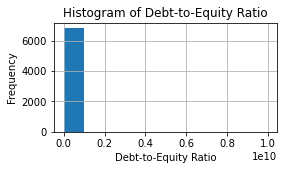

In [37]:
plt.figure(figsize=(4, 2))
df['debt_to_equity'].hist()
plt.title('Histogram of Debt-to-Equity Ratio')
plt.xlabel('Debt-to-Equity Ratio')
plt.ylabel('Frequency')
plt.show()

**Additional Financial Ratios**

**1.Asset Turnover Ratio: Leverage 'Total Asset Turnover'**

In [38]:
df['asset_turnover'] = df[' Total Asset Turnover']

In [39]:
df['asset_turnover'].describe()

count    6819.000000
mean        0.141606
std         0.101145
min         0.000000
25%         0.076462
50%         0.118441
75%         0.176912
max         1.000000
Name: asset_turnover, dtype: float64

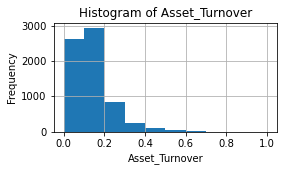

In [40]:
plt.figure(figsize=(4, 2))
df['asset_turnover'].hist()
plt.title('Histogram of Asset_Turnover')
plt.xlabel('Asset_Turnover')
plt.ylabel('Frequency')
plt.show()

**Return on Assets (ROA)**

**2.Calculate using 'Net Income to Total Assets'**

In [41]:
df['return_on_assets'] = df[' Net Income to Total Assets']

In [42]:
df['return_on_assets'].describe()

count    6819.000000
mean        0.807760
std         0.040332
min         0.000000
25%         0.796750
50%         0.810619
75%         0.826455
max         1.000000
Name: return_on_assets, dtype: float64

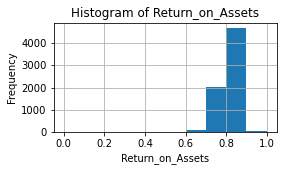

In [43]:
plt.figure(figsize=(4, 2))
df['return_on_assets'].hist()
plt.title('Histogram of Return_on_Assets')
plt.xlabel('Return_on_Assets')
plt.ylabel('Frequency')
plt.show()

**Liquidity ratio**

**3.Calculate using 'Liquidity ratio'**

In [44]:
df['current_ratio'] = df[' Current Assets/Total Assets']

In [45]:
df['current_ratio'].describe()

count    6819.000000
mean        0.522273
std         0.218112
min         0.000000
25%         0.352845
50%         0.514830
75%         0.689051
max         1.000000
Name: current_ratio, dtype: float64

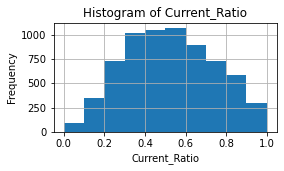

In [46]:
plt.figure(figsize=(4, 2))
df['current_ratio'].hist()
plt.title('Histogram of Current_Ratio')
plt.xlabel('Current_Ratio')
plt.ylabel('Frequency')
plt.show()

**Profitability ratio**

**4.Calculate using 'Profitability ratio'**

In [47]:
df['return_on_sales'] = df[' Total income/Total expense']

In [48]:
df['return_on_sales'].describe()

count    6819.000000
mean        0.002549
std         0.012093
min         0.000000
25%         0.002236
50%         0.002336
75%         0.002492
max         1.000000
Name: return_on_sales, dtype: float64

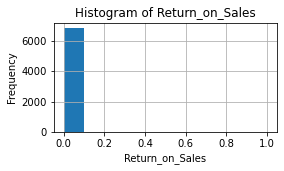

In [49]:
plt.figure(figsize=(4, 2))
df['return_on_sales'].hist()
plt.title('Histogram of Return_on_Sales')
plt.xlabel('Return_on_Sales')
plt.ylabel('Frequency')
plt.show()

**Inventory Ratio**

**5.Calculate using 'Inventory Ratio'**

In [50]:
df['inventory_turnover'] = df[' Inventory Turnover Rate (times)']

In [51]:
df['inventory_turnover'].describe()

count    6.819000e+03
mean     2.149106e+09
std      3.247967e+09
min      0.000000e+00
25%      1.728256e-04
50%      7.646743e-04
75%      4.620000e+09
max      9.990000e+09
Name: inventory_turnover, dtype: float64

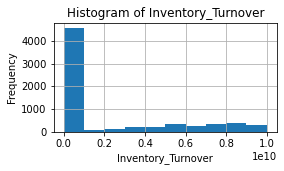

In [52]:
plt.figure(figsize=(4, 2))
df['inventory_turnover'].hist()
plt.title('Histogram of Inventory_Turnover')
plt.xlabel('Inventory_Turnover')
plt.ylabel('Frequency')
plt.show()

**Interest Ratio**

**6.Calculate using 'Interest Ratio'**

In [53]:
df['interest_coverage_ratio'] = df[' Interest Coverage Ratio (Interest expense to EBIT)']

In [54]:
df['interest_coverage_ratio'].describe()

count    6819.000000
mean        0.565358
std         0.013214
min         0.000000
25%         0.565158
50%         0.565252
75%         0.565725
max         1.000000
Name: interest_coverage_ratio, dtype: float64

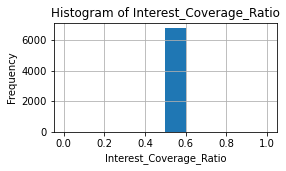

In [55]:
plt.figure(figsize=(4, 2))
df['interest_coverage_ratio'].hist()
plt.title('Histogram of Interest_Coverage_Ratio')
plt.xlabel('Interest_Coverage_Ratio')
plt.ylabel('Frequency')
plt.show()

**Cash Flow Ratio**

**7.Calculate using 'Cash Flow Ratio'**

In [56]:
df['operating_cash_flow_ratio'] = df[' Cash Flow to Sales']

In [57]:
df['operating_cash_flow_ratio'].describe()

count    6819.000000
mean        0.671531
std         0.009341
min         0.000000
25%         0.671565
50%         0.671574
75%         0.671587
max         1.000000
Name: operating_cash_flow_ratio, dtype: float64

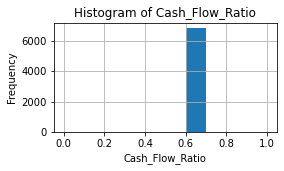

In [58]:
plt.figure(figsize=(4, 2))
df['operating_cash_flow_ratio'].hist()
plt.title('Histogram of Cash_Flow_Ratio')
plt.xlabel('Cash_Flow_Ratio')
plt.ylabel('Frequency')
plt.show()

**Log transformation**

In [59]:
df['log_debt_to_equity'] = np.log(df['debt_to_equity'])

**Handle infinity values**

In [60]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)

**Scale numeric features using RobustScaler**

In [61]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
df_scaled = scaler.fit_transform(df)

**Convert the scaled data back into a pandas DataFrame**

In [62]:
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)

**Verify the scaled data**

In [63]:
df_scaled.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Equity to Liability,debt_to_equity,asset_turnover,return_on_assets,current_ratio,return_on_sales,inventory_turnover,interest_coverage_ratio,operating_cash_flow_ratio,log_debt_to_equity
0,1.0,-2.237820,-2.525674,-2.578427,-0.337079,-0.337006,-0.423237,-2.987097,-3.588770,-7.392276,...,-0.611011,2.508623,-0.313433,-3.156866,-0.964253,-1.227520,-1.260999e-13,-2.122174,-0.295693,1.193370
1,1.0,-0.650702,-0.402644,-0.625530,0.314607,0.317657,-0.608575,-0.432258,-0.472337,0.260163,...,-0.458493,1.110092,-0.537313,-0.515808,-0.988714,-0.431455,2.025974e+00,8.693092,-0.188350,0.721623
2,1.0,-1.298101,-1.133706,-1.407442,-0.337614,-0.343994,-1.315814,-5.493907,-6.264244,-12.532520,...,-0.610821,2.505712,-1.029851,-1.210225,0.261673,-1.077444,1.406926e-02,-2.729675,-0.123649,1.192608
3,1.0,-1.742362,-2.024403,-1.663683,-1.667202,-1.673206,-2.573536,-2.573477,-2.597853,-1.479675,...,-0.346085,0.642509,-0.283582,-2.392368,-0.859638,-1.969962,1.543290e+00,-1.039192,-2.569648,0.484468
4,1.0,-0.638315,-0.398577,-0.527555,-0.535581,-0.536415,-0.391886,-0.505376,-0.453344,-0.424797,...,0.059677,-0.063305,0.567164,-0.525276,-0.465340,-0.438005,-1.301530e-13,18.302075,-0.511491,-0.066124


In [64]:
df_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Columns: 105 entries, Bankrupt? to log_debt_to_equity
dtypes: float64(105)
memory usage: 5.5 MB


In [65]:
df_scaled.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Equity to Liability,debt_to_equity,asset_turnover,return_on_assets,current_ratio,return_on_sales,inventory_turnover,interest_coverage_ratio,operating_cash_flow_ratio,log_debt_to_equity
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6818.000000
mean,0.032263,0.041907,-0.021947,0.023065,0.144812,0.145701,-2.131590,-1.419065,-1.849476,0.819326,...,0.485900,7.047822e+08,0.230611,-0.096241,0.022140,0.830324,4.651745e-01,0.187184,-2.025077,-0.031682
std,0.176710,1.027948,1.223929,1.083871,1.257197,1.261618,103.821920,66.683897,86.260806,93.876792,...,1.763460,2.687526e+10,1.006921,1.357772,0.648746,47.190568,7.030232e-01,23.333779,438.125501,1.139880
min,0.000000,-8.515277,-10.441281,-9.718323,-44.990369,-45.194303,-7972.344859,-4132.258065,-5133.382329,-2552.439024,...,-1.191691,-8.851051e-01,-1.179104,-27.289270,-1.531296,-9.116590,-1.655139e-13,-998.125033,-31497.997097,-3.471869
25%,0.000000,-0.443435,-0.452466,-0.439943,-0.412253,-0.413330,-0.423237,-0.402867,-0.403386,-0.497967,...,-0.328654,-4.052245e-01,-0.417910,-0.466903,-0.481802,-0.392479,-1.281058e-13,-0.165161,-0.407991,-0.543551
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
75%,0.000000,0.556565,0.547534,0.560057,0.587747,0.586670,0.576763,0.597133,0.596614,0.502033,...,0.671346,5.947755e-01,0.582090,0.533097,0.518198,0.607521,1.000000e+00,0.834839,0.592009,0.456449
max,1.000000,8.423617,8.210473,7.878474,29.251471,29.386724,7.802674,1049.493190,1209.018993,5856.867886,...,34.067843,1.586277e+12,8.776119,6.375459,1.443077,3893.247666,2.162338e+00,767.680588,15403.757680,25.057096


**Correlation Analysis**

In [66]:
corr_matrix = df.corr()
corr_with_target = corr_matrix['Bankrupt?'].sort_values(ascending=False)
print(corr_with_target)

Bankrupt?                                             1.000000
 Debt ratio %                                         0.250161
 Current Liability to Assets                          0.194494
log_debt_to_equity                                    0.179451
 Borrowing dependency                                 0.176543
                                                        ...   
 ROA(B) before interest and depreciation after tax   -0.273051
 ROA(A) before interest and % after tax              -0.282941
return_on_assets                                     -0.315457
 Net Income to Total Assets                          -0.315457
 Net Income Flag                                           NaN
Name: Bankrupt?, Length: 105, dtype: float64


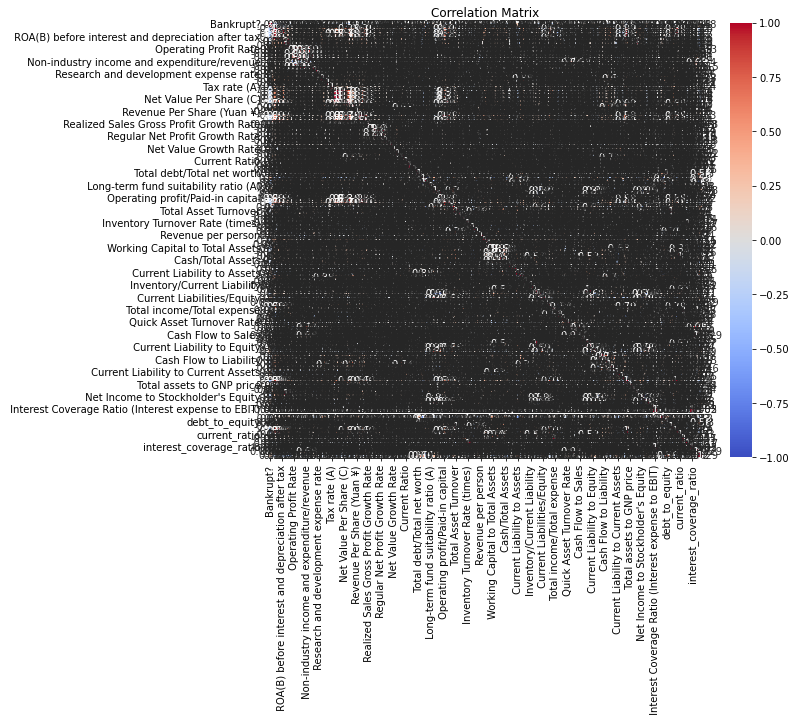

In [67]:
# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

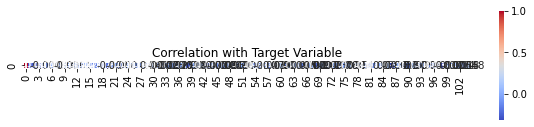

In [68]:
# Highlight the row corresponding to the target variable
target_row = corr_matrix.loc['Bankrupt?'].values.reshape(1, -1)
plt.figure(figsize=(10, 2))
sns.heatmap(target_row, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation with Target Variable')
plt.show()

**Mutual Information**

In [69]:
from sklearn.feature_selection import mutual_info_classif
import pandas as pd

In [70]:
# Drop rows with missing values
df_clean = df.dropna()

In [71]:
# Calculate mutual information
mutual_info = mutual_info_classif(df_clean.drop('Bankrupt?', axis=1), df_clean['Bankrupt?'])

In [72]:
# Create a DataFrame with mutual information
mutual_info_df = pd.DataFrame({'Feature': df_clean.drop('Bankrupt?', axis=1).columns, 'Mutual Information': mutual_info})

In [73]:
# Sort the DataFrame by mutual information in descending order
mutual_info_df = mutual_info_df.sort_values(by='Mutual Information', ascending=False)

In [74]:
print(mutual_info_df)

                                      Feature  Mutual Information
18    Persistent EPS in the Last Four Seasons            0.041499
89         Net Income to Stockholder's Equity            0.040487
22   Per Share Net profit before tax (Yuan ¥)            0.039900
42      Net profit before tax/Paid-in capital            0.039393
39                       Borrowing dependency            0.039238
..                                        ...                 ...
45               Accounts Receivable Turnover            0.000000
49            Net Worth Turnover Rate (times)            0.000000
75                     Fixed Assets to Assets            0.000000
55                Current Assets/Total Assets            0.000000
62                Inventory/Current Liability            0.000000

[104 rows x 2 columns]


**Recursive Feature Elimination (RFE)**

In [75]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

In [76]:
df_clean = df.dropna()
rfc = RandomForestClassifier(n_estimators=10)
rfe = RFE(estimator=rfc, n_features_to_select=10)
rfe.fit(df_clean.drop('Bankrupt?', axis=1), df_clean['Bankrupt?'])

RFE(estimator=RandomForestClassifier(n_estimators=10), n_features_to_select=10)

In [77]:
rfe_df = pd.DataFrame({'Feature': df.drop('Bankrupt?', axis=1).columns, 'Selected': rfe.support_})
rfe_df = rfe_df.sort_values(by='Selected', ascending=False)
print(rfe_df)

                                      Feature  Selected
56                          Cash/Total Assets      True
64                     Working Capital/Equity      True
34                     Interest Expense Ratio      True
39                       Borrowing dependency      True
18    Persistent EPS in the Last Four Seasons      True
..                                        ...       ...
33                                Quick Ratio     False
32                              Current Ratio     False
31                        Cash Reinvestment %     False
30       Total Asset Return Growth Rate Ratio     False
103                        log_debt_to_equity     False

[104 rows x 2 columns]


# 4.Modeling & Evaluate

**1.Logistic Regression**

**Import necessary libraries**

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [79]:
X = df.drop('Bankrupt?', axis=1)
y = df['Bankrupt?']           

In [80]:
df_clean = df.dropna()

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [82]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [83]:
# Train the model

logreg = LogisticRegression(max_iter=1000)
logreg.fit(df_clean.drop('Bankrupt?', axis=1), df_clean['Bankrupt?'])

LogisticRegression(max_iter=1000)

In [84]:
# Make predictions

y_pred = logreg.predict(X_test)

In [85]:
# Evaluate the model

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9596774193548387
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1313
           1       0.25      0.04      0.07        51

    accuracy                           0.96      1364
   macro avg       0.61      0.52      0.52      1364
weighted avg       0.94      0.96      0.95      1364

Confusion Matrix:
[[1307    6]
 [  49    2]]


**2.Decision Tree Classifier**

In [86]:
from sklearn.tree import DecisionTreeClassifier

# Train the model with pruning
dtc = DecisionTreeClassifier(random_state=42, max_depth=5, min_samples_split=10, min_samples_leaf=5)
dtc.fit(df_clean.drop('Bankrupt?', axis=1), df_clean['Bankrupt?'])

# Make predictions
y_pred = dtc.predict(X_test)

# Evaluate the model

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9706744868035191
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1313
           1       0.74      0.33      0.46        51

    accuracy                           0.97      1364
   macro avg       0.86      0.66      0.72      1364
weighted avg       0.97      0.97      0.97      1364

Confusion Matrix:
[[1307    6]
 [  34   17]]


**3.Random Forest Classifier**

In [87]:
from sklearn.ensemble import RandomForestClassifier

# Train the model
rfc = RandomForestClassifier(n_estimators=10, random_state=42)
rfc.fit(df_clean.drop('Bankrupt?', axis=1), df_clean['Bankrupt?'])

# Make predictions on the training data
y_pred_train = rfc.predict(df_clean.drop('Bankrupt?', axis=1))

# Evaluate the model on the training data
accuracy_train = accuracy_score(df_clean['Bankrupt?'], y_pred_train)
print("Training Accuracy:", accuracy_train)

# Make predictions on the testing data
y_pred = rfc.predict(X_test)

# Evaluate the model on the testing data
accuracy = accuracy_score(y_test, y_pred)
print("Testing Accuracy:", accuracy)

Training Accuracy: 0.9951598709298914
Testing Accuracy: 0.9956011730205279


**Evaluate the performance of a RandomForestClassifier on the dataset**

**Handling class imbalance** 

In [88]:
class_counts = df_clean['Bankrupt?'].value_counts()
print("Class Counts:")
print(class_counts)

Class Counts:
Bankrupt?
0    6598
1     220
Name: count, dtype: int64


Dataset has a significant class imbalance 

With 6598 negative samples (class 0) and only 220 positive samples (class 1)

To address this,weighting (class_weight='balanced') to give more importance to the minority class during training.

**Train the model with class weighting**

In [89]:
from sklearn.ensemble import RandomForestClassifier

# Train the model with class weighting
rfc = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rfc.fit(df_clean.drop('Bankrupt?', axis=1), df_clean['Bankrupt?'])

RandomForestClassifier(class_weight='balanced', random_state=42)

In [90]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [91]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_clean.drop('Bankrupt?', axis=1), df_clean['Bankrupt?'], test_size=0.2, random_state=None)

# Define the hyperparameter tuning space
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 5, 10]
}

**Hyperparameter tuning** 

Using RandomizedSearchCV to perform hyperparameter tuning for the RandomForestClassifier.

This involves searching for the optimal combination of hyperparameters

( n_estimators, max_depth, min_samples_split, and min_samples_leaf) that results in the best performance on your dataset.

In [92]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_clean.drop('Bankrupt?', axis=1), df_clean['Bankrupt?'], test_size=0.2, random_state=42)

In [93]:
# Define RandomizedSearchCV object
random_search = RandomizedSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='f1_macro', n_iter=10)

In [94]:
# Perform hyperparameter tuning
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   param_distributions={'max_depth': [None, 5, 10, 15, 20],
                                        'min_samples_leaf': [1, 5, 10],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   scoring='f1_macro')

In [95]:
# Print best hyperparameters and score
print("Best Hyperparameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

Best Hyperparameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 15}
Best Score: 0.6262260015171685


In [96]:
# Train a new model using the best hyperparameters
best_model = random_search.best_estimator_

In [97]:
# Make predictions on the testing data
y_pred = best_model.predict(X_test)

In [98]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9728739002932552
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1319
           1       1.00      0.18      0.30        45

    accuracy                           0.97      1364
   macro avg       0.99      0.59      0.64      1364
weighted avg       0.97      0.97      0.96      1364

Confusion Matrix:
[[1319    0]
 [  37    8]]


**4.Support Vector Machine (SVM)**

In [99]:
from sklearn import svm

In [100]:
# Train the model
svm_model = svm.SVC(random_state=42)
svm_model.fit(X_train, y_train)

SVC(random_state=42)

In [101]:
# Make predictions
y_pred = svm_model.predict(X_test)

In [102]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.967008797653959
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1319
           1       0.00      0.00      0.00        45

    accuracy                           0.97      1364
   macro avg       0.48      0.50      0.49      1364
weighted avg       0.94      0.97      0.95      1364

Confusion Matrix:
[[1319    0]
 [  45    0]]


**5.Neural Network**

In [103]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import StandardScaler

In [104]:
# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [105]:
# Build the NN model
nn_model = Sequential()
nn_model.add(Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)))
nn_model.add(Dense(32, activation='relu'))
nn_model.add(Dense(1, activation='sigmoid'))

In [106]:
# Compile the model
nn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [107]:
# Train the model
nn_model.fit(X_train_scaled, y_train, epochs=10, batch_size=128, validation_data=(X_test_scaled, y_test))

Epoch 1/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.9663 - loss: 0.3107 - val_accuracy: 0.9670 - val_loss: 14132694.0000
Epoch 2/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9684 - loss: 0.1205 - val_accuracy: 0.9699 - val_loss: 14837331.0000
Epoch 3/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9717 - loss: 0.0865 - val_accuracy: 0.9707 - val_loss: 15086050.0000
Epoch 4/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9657 - loss: 0.0917 - val_accuracy: 0.9707 - val_loss: 15856003.0000
Epoch 5/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9701 - loss: 0.0816 - val_accuracy: 0.9707 - val_loss: 17563892.0000
Epoch 6/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9706 - loss: 0.0777 - val_accuracy: 0.9699 - val_loss: 18139482.0000
Epoch 7/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9726 - loss: 0.0740 - val_accuracy: 0.9677 - val_loss: 18955488.0000
Epoch 8/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9741

In [108]:
# Make predictions on the test data
y_pred = nn_model.predict(X_test_scaled)
y_pred_class = (y_pred > 0.5).astype('int32')

43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [109]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_class)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred_class))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_class))

Accuracy: 0.9699413489736071
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1319
           1       0.62      0.22      0.33        45

    accuracy                           0.97      1364
   macro avg       0.80      0.61      0.66      1364
weighted avg       0.96      0.97      0.96      1364

Confusion Matrix:
[[1313    6]
 [  35   10]]


**Comparison**

In [110]:
models = {
    "Logistic Regression":  0.9596,
    "Decision Tree Classifier": 0.9706,
    "Random Forest Classifier": 0.9728,
    "Support Vector Machine (SVM)":  0.9670,
    "Neural Network (NN)": 0.9699
}

In [111]:
best_model = max(models, key=models.get)
print("Best performing model:", best_model)
print("Accuracy:", models[best_model])

Best performing model: Random Forest Classifier
Accuracy: 0.9728


In [112]:
print("\nModel Comparison:")
for model, accuracy in models.items():
    print(f"{model}: {accuracy:.4f}")


Model Comparison:
Logistic Regression: 0.9596
Decision Tree Classifier: 0.9706
Random Forest Classifier: 0.9728
Support Vector Machine (SVM): 0.9670
Neural Network (NN): 0.9699


**Conclusion**

In conclusion, the fintech firm's transition to an AI-first strategy requires a structured approach to ensure efficiency and success. By following the outlined action points, the firm can effectively:

1.Prepare high-quality data for AI model training.
2.Develop and deploy accurate AI models for bankruptcy prediction, clustering, and regression tasks.
3.Integrate AI models with existing systems and infrastructure.
4.Continuously monitor and improve AI model performance.
5.Manage cultural and organizational changes through effective change management and training programs.

**Key Benefits**

The successful implementation of an AI-first strategy will bring numerous benefits to the fintech firm, including:

1.Improved Decision-Making: AI-driven insights will enable data-driven decision-making, reducing the risk of human bias and error.
2.Enhanced Efficiency: Automated processes and AI-powered analytics will streamline operations, freeing up resources for strategic growth initiatives.
3.Competitive Advantage: The firm will gain a competitive edge by leveraging AI to improve customer experiences, reduce costs, and increase revenue.
4.Risk Management: AI-powered risk management will enable the firm to identify and mitigate potential risks more effectively.

**Final Recommendations**

To ensure a successful transition, we recommend:

1.Establishing a dedicated AI team to oversee the transition process.
2.Investing in AI-specific infrastructure and tools.
3.Providing ongoing training and education for employees on AI capabilities and limitations.
4.Continuously monitoring and evaluating AI model performance to ensure optimal results.

By following these recommendations and action points, the fintech firm can successfully transition to an AI-first strategy, driving business growth, improvement, and sustainability.

**EDA**

In [114]:
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [115]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_clean.drop('Bankrupt?', axis=1), df_clean['Bankrupt?'], test_size=0.2, random_state=None)

# Define the hyperparameter tuning space
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 5, 10]
}

In [116]:
rfc = RandomForestClassifier(n_estimators=10, random_state=42)
rfc.fit(df_clean.drop('Bankrupt?', axis=1), df_clean['Bankrupt?'])

RandomForestClassifier(n_estimators=10, random_state=42)

In [117]:
rfe = RFE(RandomForestClassifier(n_estimators=10, random_state=42), n_features_to_select=20)
rfe.fit(X_train, y_train)

RFE(estimator=RandomForestClassifier(n_estimators=10, random_state=42),
    n_features_to_select=20)

In [118]:
print("Selected Features:", X_train.columns[rfe.support_])

Selected Features: Index([' ROA(C) before interest and depreciation before interest',
       ' Operating Expense Rate', ' Interest-bearing debt interest rate',
       ' Persistent EPS in the Last Four Seasons', ' Net Value Growth Rate',
       ' Total Asset Return Growth Rate Ratio', ' Interest Expense Ratio',
       ' Borrowing dependency', ' Net profit before tax/Paid-in capital',
       ' Fixed Assets Turnover Frequency', ' Operating profit per person',
       ' Allocation rate per person', ' Working Capital to Total Assets',
       ' Cash/Total Assets', ' Cash/Current Liability',
       ' Working Capital/Equity', ' Net Income to Total Assets',
       ' Net Income to Stockholder's Equity',
       ' Interest Coverage Ratio (Interest expense to EBIT)',
       ' Equity to Liability'],
      dtype='object')


**VISUALIZATION**

In [123]:
!pip install lime

     ------------------------------------ 275.7/275.7 kB 283.0 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283846 sha256=d912c98c329ffbbd8d1eb0c6020b00900c220199a93d1296f6a3beab387ebbb3
  Stored in directory: c:\users\samim imtiaz\appdata\local\pip\cache\wheels\85\fa\a3\9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime


In [124]:
# Fit the RandomForestClassifier model on the selected features
rfc_selected = RandomForestClassifier(n_estimators=10, random_state=42)
rfc_selected.fit(X_train[X_train.columns[rfe.support_]], y_train)

RandomForestClassifier(n_estimators=10, random_state=42)

In [126]:
from lime.lime_tabular import LimeTabularExplainer

In [127]:
# Create a LimeTabularExplainer object
explainer = LimeTabularExplainer(X_test[X_test.columns[rfe.support_]].values, 
                                     feature_names=X_test.columns[rfe.support_], 
                                     class_names=['Class 0', 'Class 1'], 
                                     discretize_continuous=True)

In [128]:
# Explain an instance
exp = explainer.explain_instance(X_test[X_test.columns[rfe.support_]].values[0], 
                                     rfc_selected.predict_proba, 
                                     num_features=10)

# Print the explanation
print(exp.as_list())

[('0.26 <  Total Asset Return Growth Rate Ratio <= 0.26', -0.05431678534545113), (' Borrowing dependency <= 0.37', -0.039802227835564516), ("0.84 <  Net Income to Stockholder's Equity <= 0.84", -0.03502893107270425), (' Interest Expense Ratio <= 0.63', 0.022437434596188188), (' Equity to Liability > 0.05', -0.017489668381847682), ('0.48 <  ROA(C) before interest and depreciation before interest <= 0.50', -0.015805602233083735), (' Interest Coverage Ratio (Interest expense to EBIT) <= 0.57', -0.011235463048442099), ('0.40 <  Operating profit per person <= 0.40', -0.009969541109625037), (' Allocation rate per person <= 0.00', 0.009547733940364064), ('0.21 <  Persistent EPS in the Last Four Seasons <= 0.22', -0.009009389708650912)]


**In this case, the top three features are most important to the predicted outcome**

1. "Total Asset Return Growth Rate Ratio" (importance score: -0.0543)
2. "Borrowing dependency" (importance score: -0.0398)
3. "Net Income to Stockholder's Equity" (importance score: -0.0350)

In [129]:
import matplotlib.pyplot as plt

# Get the feature names and importance scores
feature_names = [x[0] for x in exp.as_list()]
importance_scores = [x[1] for x in exp.as_list()]

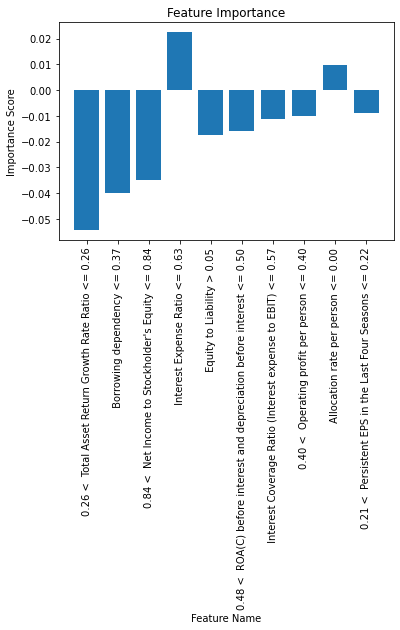

In [130]:
# Create a bar chart
plt.bar(feature_names, importance_scores)
plt.xlabel('Feature Name')
plt.ylabel('Importance Score')
plt.title('Feature Importance')
plt.xticks(rotation=90)  # Rotate the x-axis labels for better readability
plt.show()

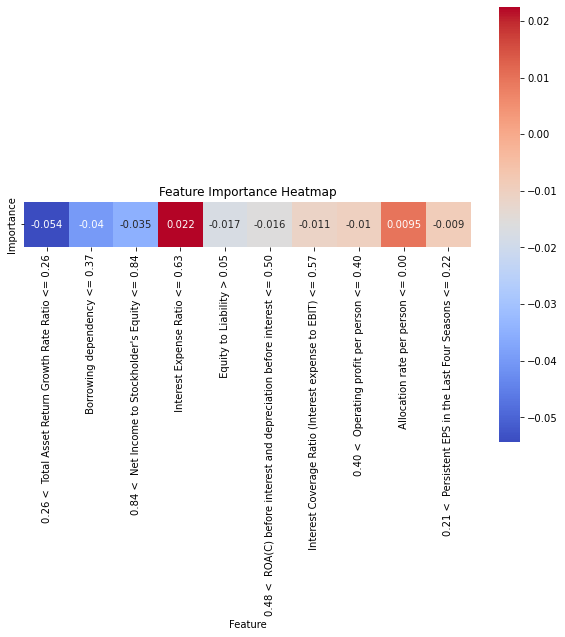

In [134]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get the feature names and importance scores
feature_names = [x[0] for x in exp.as_list()]
importance_scores = [x[1] for x in exp.as_list()]

# Create a dataframe with the feature names and importance scores
df = pd.DataFrame({'Feature': feature_names, 'Importance': importance_scores})

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.set_index('Feature').T, annot=True, cmap='coolwarm', square=True)
plt.title('Feature Importance Heatmap')
plt.show()